# Californea Dataset: House Price Prediction*($100,000)

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve

<h1> Data Loading</h1>

In [ ]:
from sklearn.datasets import  fetch_california_housing
cal=fetch_california_housing(as_frame=True) ## frame will returnas dataframe object
print(cal["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

  DataSet Exploration

In [ ]:
# full data
data=cal["frame"]
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
data.loc[data["Population"]>=data["Population"].max()/2,:]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344


In [ ]:
data.loc[data["AveRooms"]>=data["AveRooms"].max()/2,:]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [ ]:
data.loc[data["AveOccup"]>=data["AveOccup"].max()/2,:]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.var()

MedInc         3.609323e+00
HouseAge       1.583963e+02
AveRooms       6.121533e+00
AveBedrms      2.245915e-01
Population     1.282470e+06
AveOccup       1.078700e+02
Latitude       4.562293e+00
Longitude      4.014139e+00
MedHouseVal    1.331615e+00
dtype: float64

Text(0.5, 1.0, 'Hist plot of features')

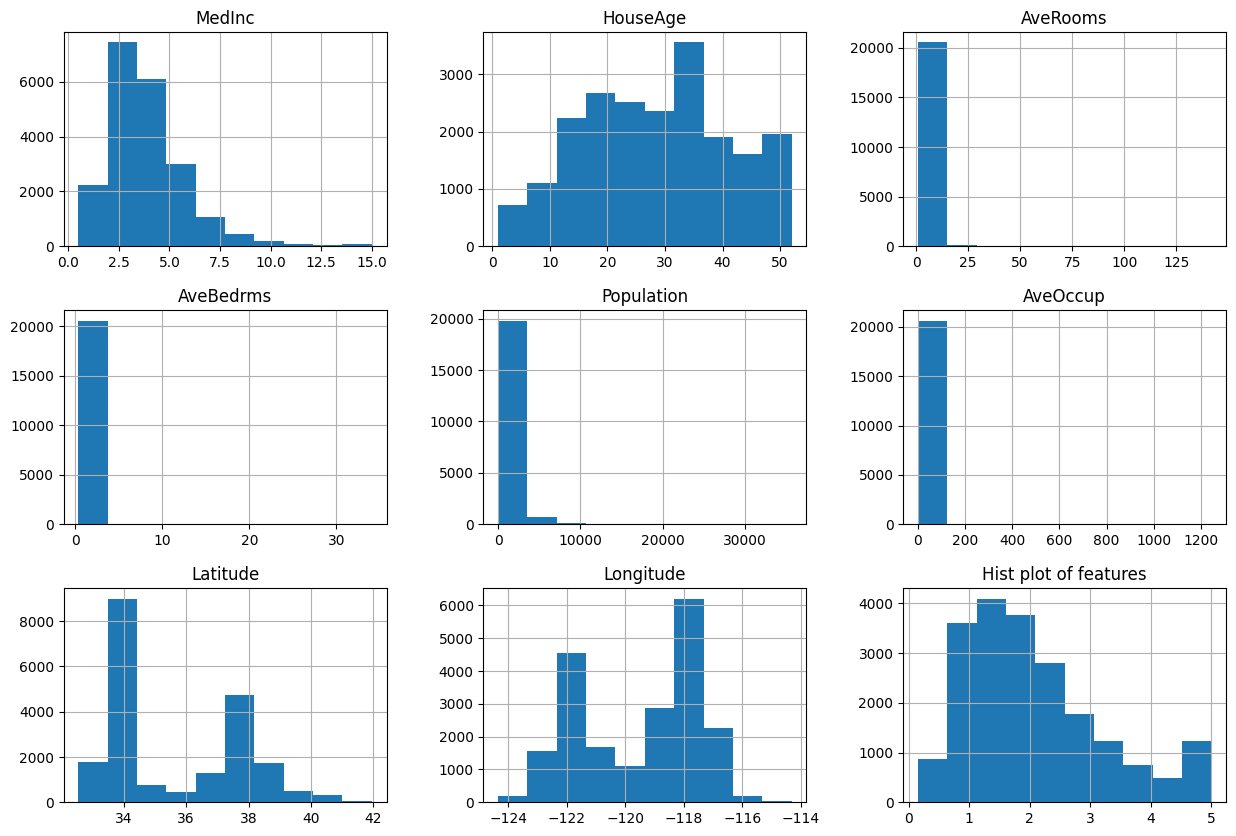

In [ ]:
data.hist(figsize=(15,10));
plt.title("Hist plot of features")

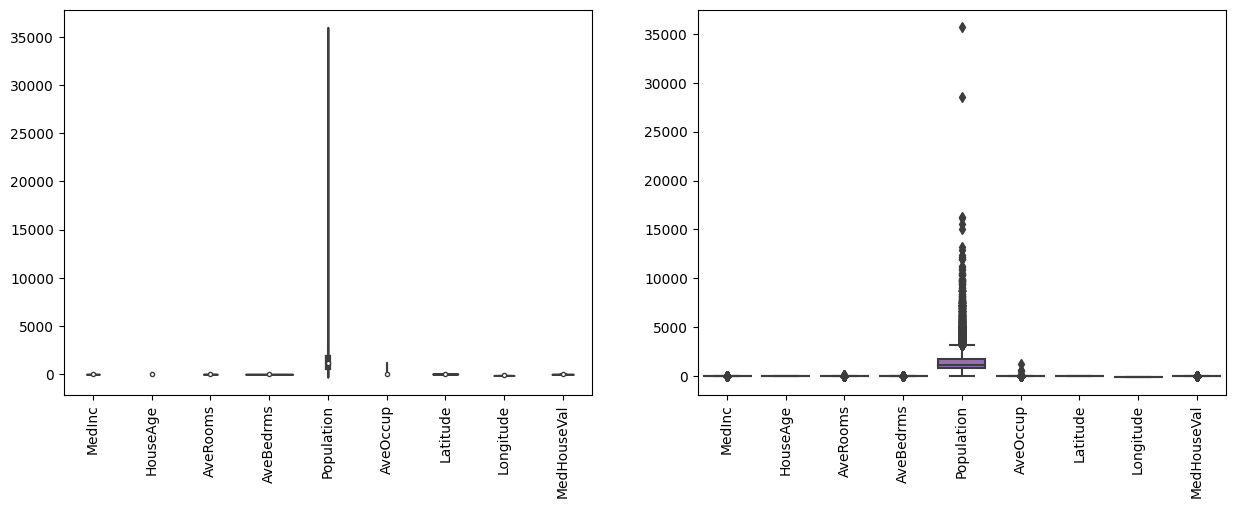

In [ ]:
plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
plot2=sns.violinplot(data)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90);
plt.subplot(1,2,2)
plot1=sns.boxplot(data)
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90);

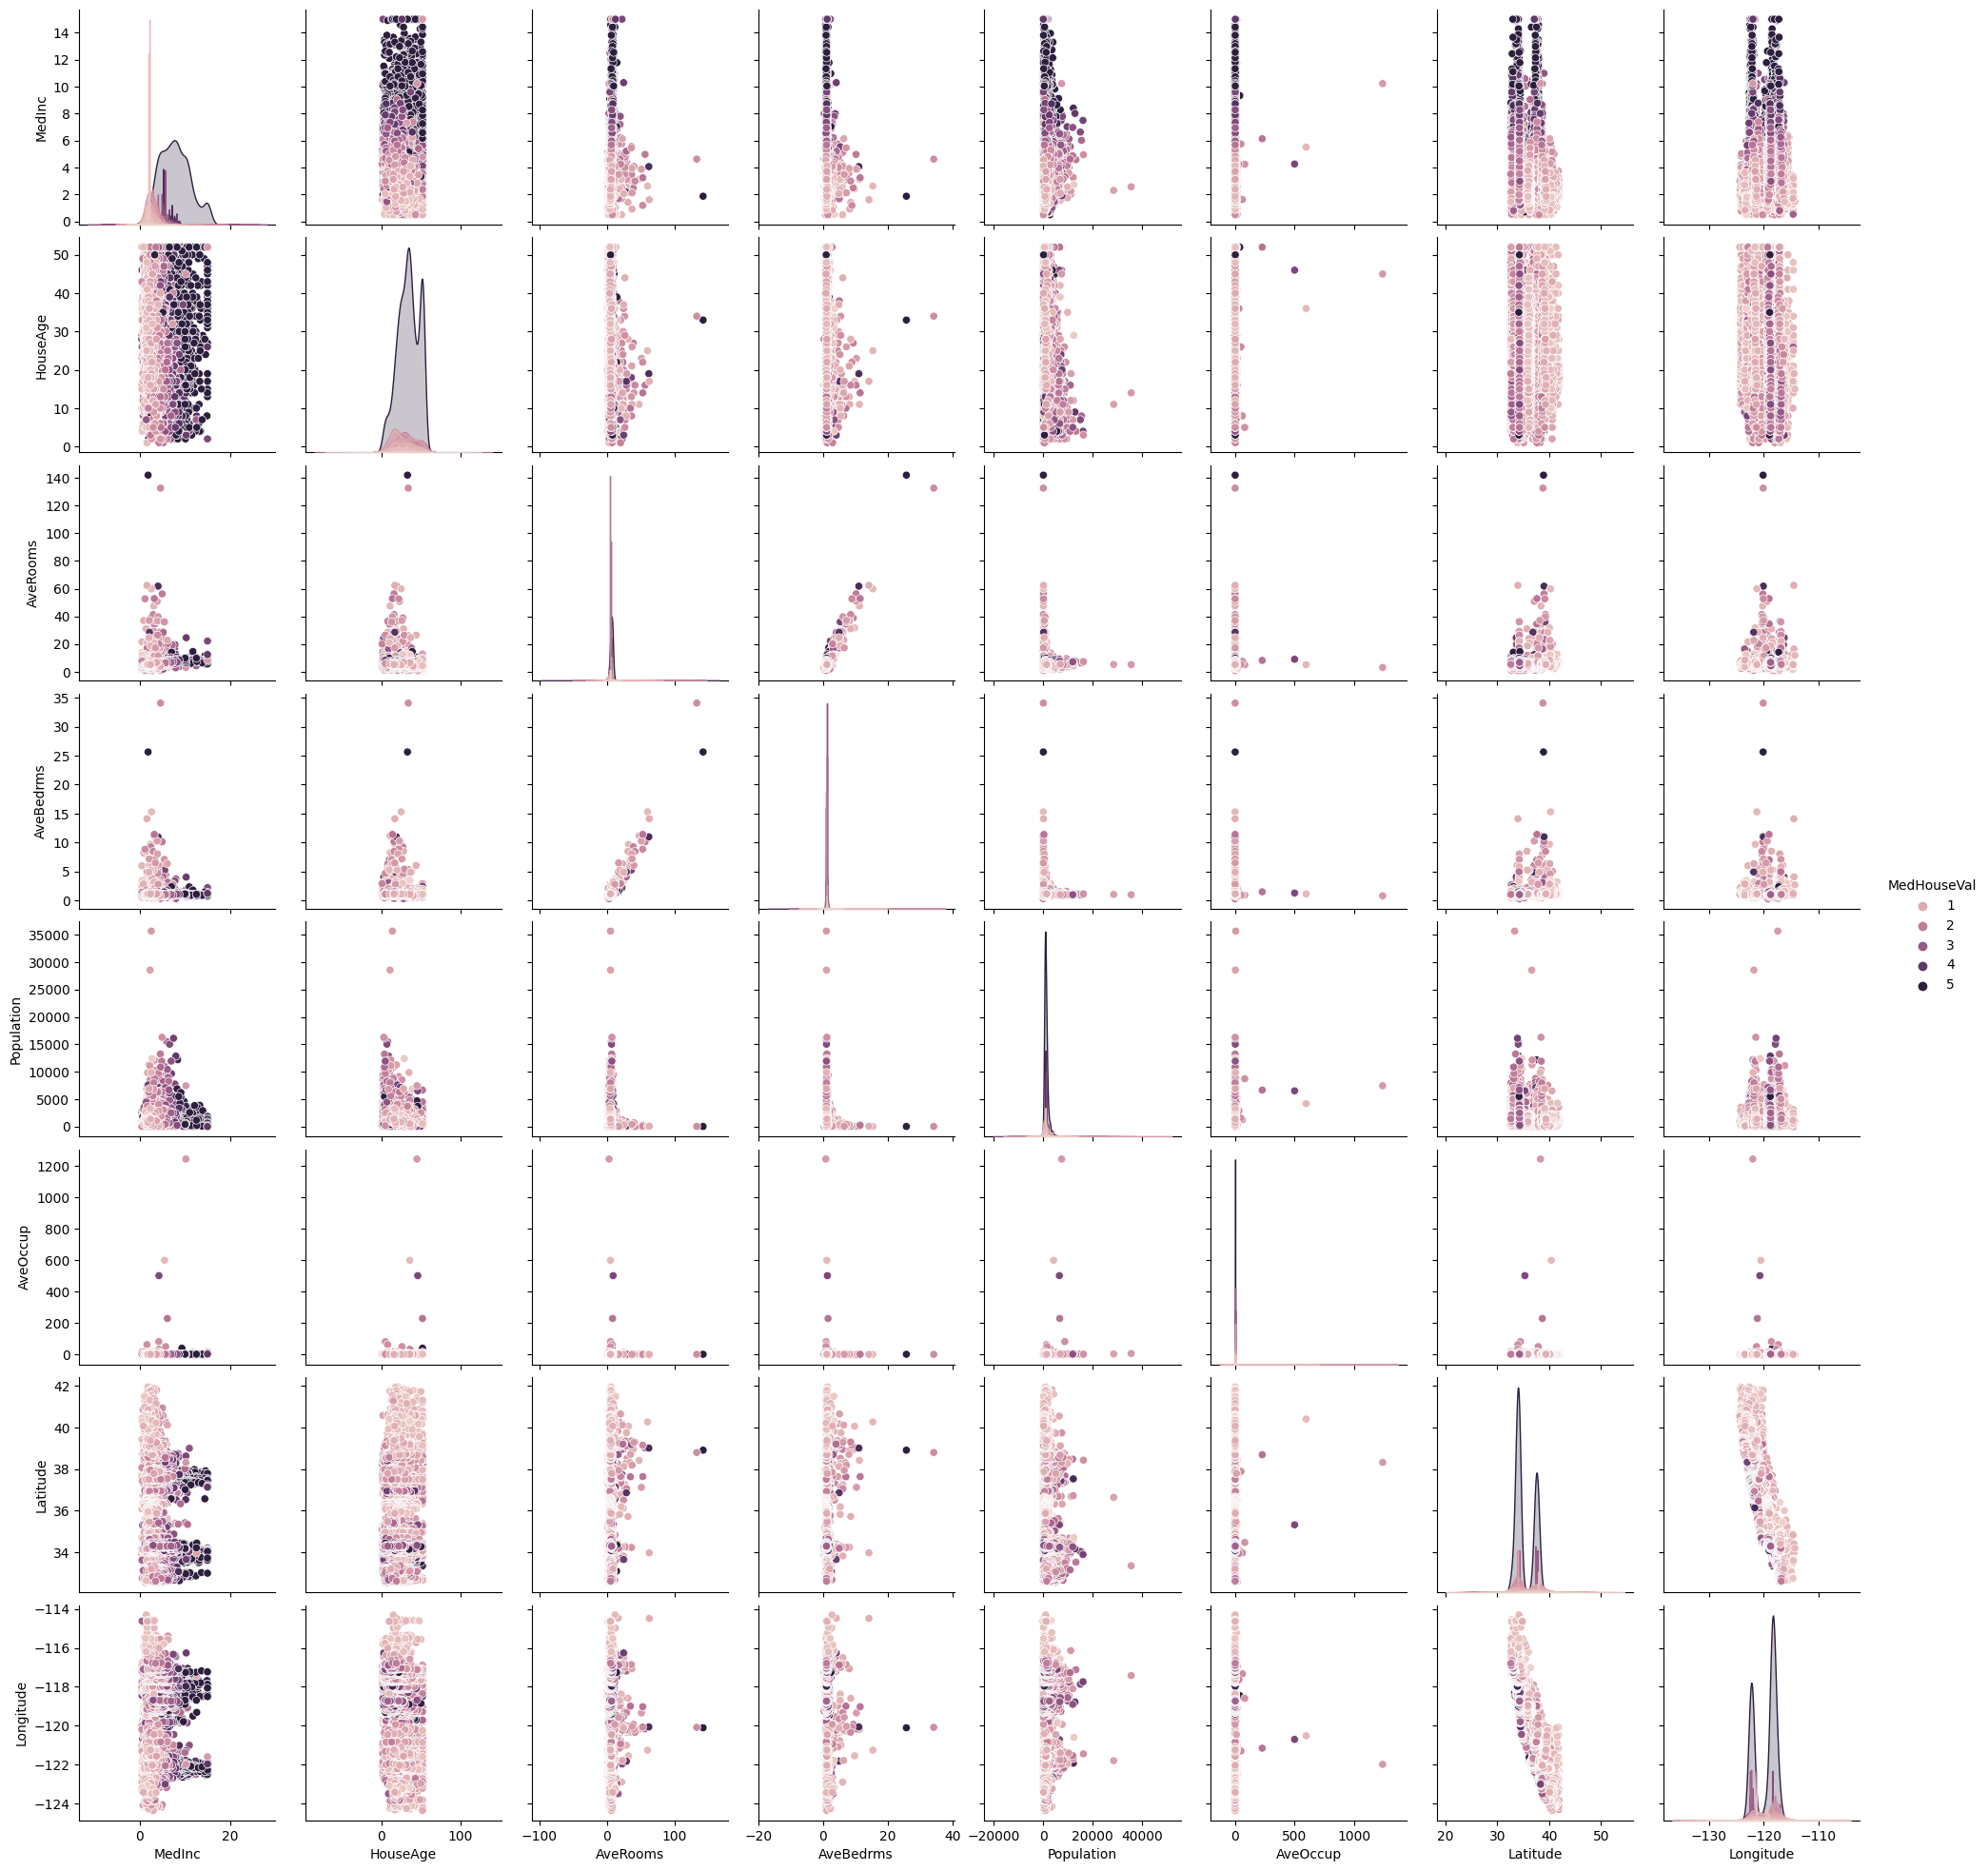

In [ ]:
sns.pairplot(data=data,hue="MedHouseVal")

Dataset Description

In [ ]:
dfx=pd.DataFrame(cal["data"],columns=cal["feature_names"])
dfy=pd.Series(cal["target"])

In [ ]:
dfx.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
dfx.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

 shape of feature matrix

In [ ]:
dfx.shape

(20640, 8)

 shape of y label

In [ ]:
dfy.shape

(20640,)

In [ ]:
dfy.head(5)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
dfy.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [ ]:
dfy.isna().sum()

0

##Preprocessing:  Feature Engineering

 Feature Imputation and Scaling </h1>

In [ ]:
cat_col=data.select_dtypes(include=["object"]).columns
print("categorical col ",cat_col)
bool_col=data.select_dtypes(include=["bool"]).columns
print("bool col ",bool_col)
num_col=data.select_dtypes(exclude=["object","bool"]).columns
print("numerical col ",num_col)

categorical col  Index([], dtype='object')
bool col  Index([], dtype='object')
numerical col  Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer # for y var, same as one-hot
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# dierntiating oridinal and label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
x=np.array(["a","b","c","c"]).reshape(-1,1)
le=LabelEncoder()
oe=OrdinalEncoder(categories=[["b","c","a"]])
oe.fit_transform(x)

array([[2.],
       [0.],
       [1.],
       [1.]])

In [ ]:
cat_pipe=Pipeline([("simp_imputer",SimpleImputer(strategy="most_frequent")),("encoder", LabelEncoder()),("minmaxscaler",MinMaxScaler())])

# n-impute based on distance between points
cat_imp_pipe1=Pipeline([("knn_imp",KNNImputer(n_neighbors=3))])

#for numerical dtypes
num_pipe=Pipeline([("imputer",SimpleImputer(strategy="mean")),("minmaxscaler",MinMaxScaler())])

In [ ]:
# transformation using featureunion
from sklearn import set_config
set_config(display="daigram")
FeatureUnion([("cat_pipe",cat_pipe)])

FeatureUnion(transformer_list=[('cat_pipe',
                                Pipeline(steps=[('simp_imputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('encoder', LabelEncoder()),
                                                ('minmaxscaler',
                                                 MinMaxScaler())]))])

In [ ]:
transformer0=ColumnTransformer([("cat_impute",cat_pipe,cat_col),("num_imp",num_pipe,num_col)], remainder="passthrough")

transorm_data=transformer0.fit_transform(data)
data1=pd.DataFrame(transorm_data,columns=data.columns)
data1.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638


In [ ]:
data1.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,0.395579
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,0.215671
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,0.339588
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data1.var()

MedInc         0.017166
HouseAge       0.060898
AveRooms       0.000308
AveBedrms      0.000197
Population     0.001007
AveOccup       0.000070
Latitude       0.051523
Longitude      0.039822
MedHouseVal    0.056610
dtype: float64

 Visualization

<Axes: ylabel='Density'>

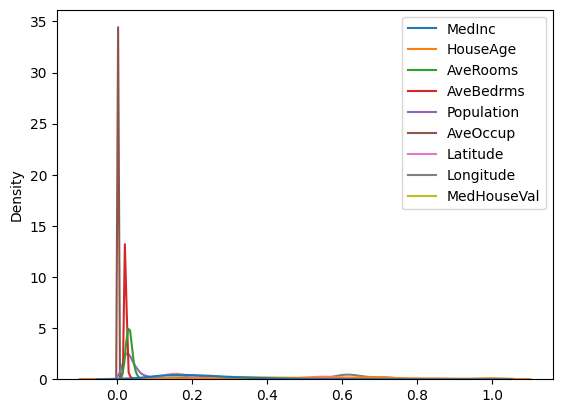

In [ ]:
sns.kdeplot(data1.select_dtypes(include=["float64"]))

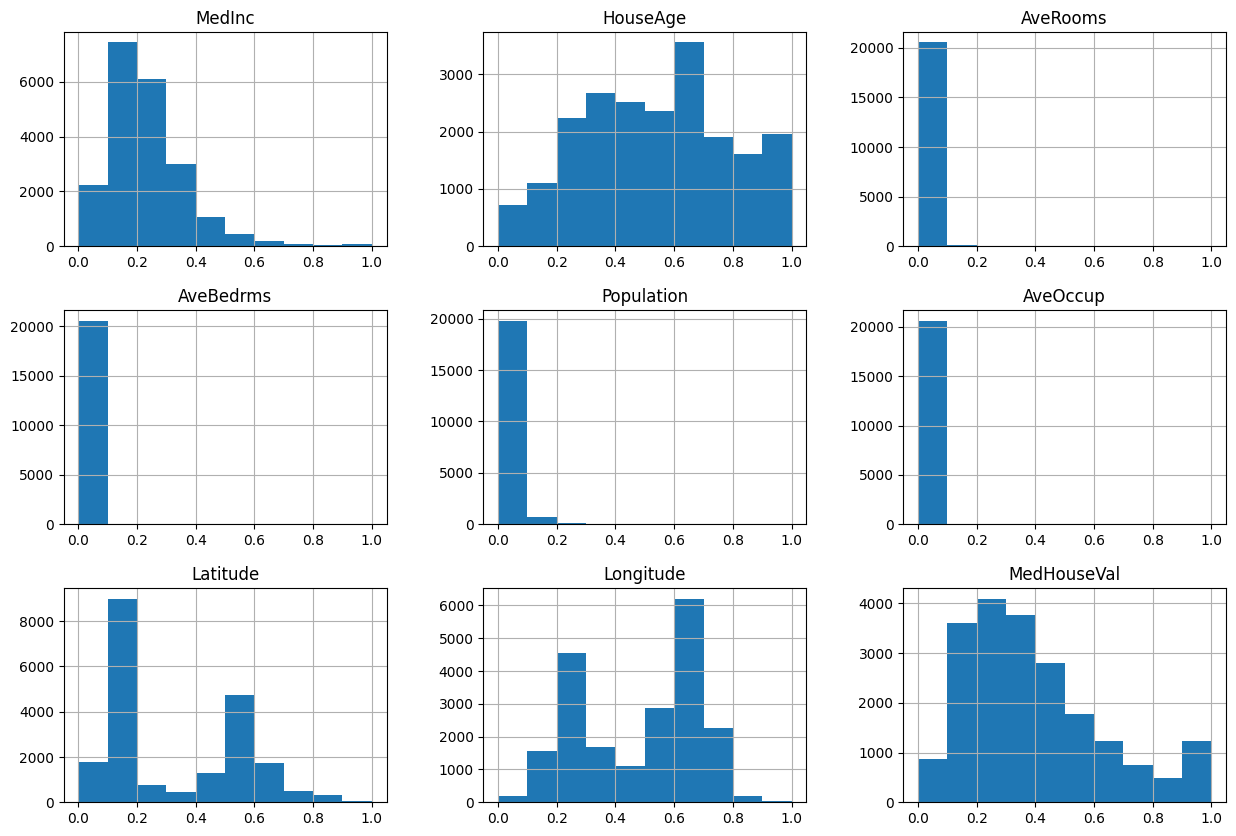

In [ ]:
data1.hist(figsize=(15,10));

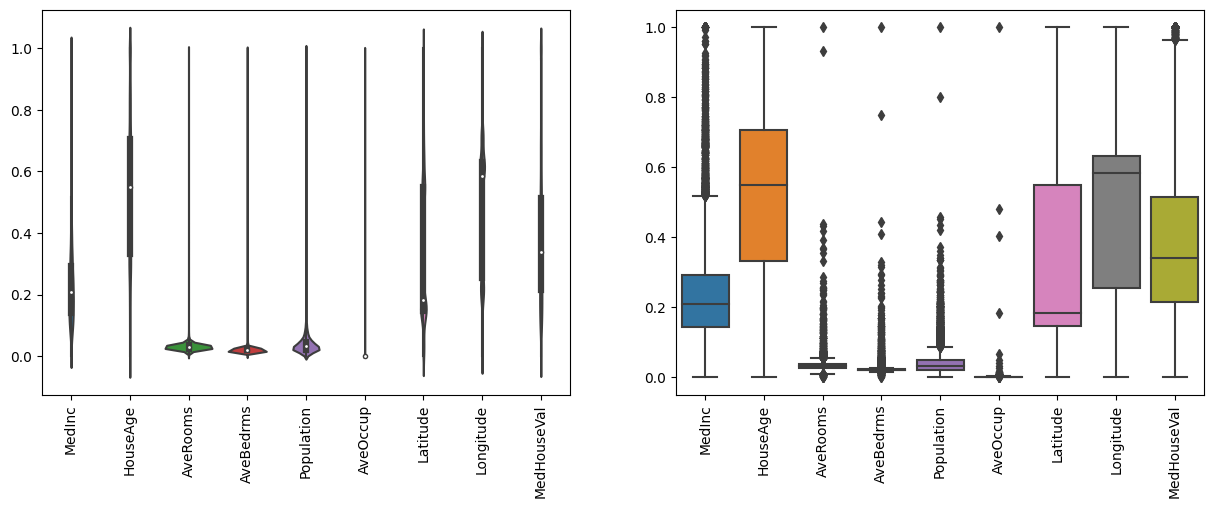

In [ ]:
plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
plot2=sns.violinplot(data1)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90);
plt.subplot(1,2,2)
plot1=sns.boxplot(data1)
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90);

 <h1> Removing Outliers </h1>

In [ ]:
#mean(+=)3sigma: 99.7 % data
stdev=data1.std()
mean=data1.mean()
print("mean------",mean,"\n\n\n","stdev----------", stdev)

thresh_Upper=mean+3*stdev
thresh_low=mean-1*stdev
print("\n\n\nupper threshold--------",thresh_Upper,"\n\n\n","thresh low---------",thresh_low)

mean------ MedInc         0.232464
HouseAge       0.541951
AveRooms       0.032488
AveBedrms      0.022629
Population     0.039869
AveOccup       0.001914
Latitude       0.328572
Longitude      0.476125
MedHouseVal    0.395579
dtype: float64 


 stdev---------- MedInc         0.131020
HouseAge       0.246776
AveRooms       0.017539
AveBedrms      0.014049
Population     0.031740
AveOccup       0.008358
Latitude       0.226988
Longitude      0.199555
MedHouseVal    0.237928
dtype: float64



upper threshold-------- MedInc         0.625525
HouseAge       1.282278
AveRooms       0.085106
AveBedrms      0.064775
Population     0.135090
AveOccup       0.026988
Latitude       1.009534
Longitude      1.074790
MedHouseVal    1.109364
dtype: float64 


 thresh low--------- MedInc         0.101443
HouseAge       0.295175
AveRooms       0.014948
AveBedrms      0.008580
Population     0.008128
AveOccup      -0.006444
Latitude       0.101584
Longitude      0.276570
MedHouseVal    0.157651
dtype: fl

In [ ]:
data2.mean()

MedInc         0.232644
HouseAge       0.544899
AveRooms       0.032413
AveBedrms      0.022597
Population     0.039784
AveOccup       0.001919
Latitude       0.324379
Longitude      0.479418
MedHouseVal    0.397162
dtype: float64

In [ ]:
# Function transform: to transform data using a user definded function to remove outlier (mean+->2sigma)
from sklearn.preprocessing import FunctionTransformer

def outlier(data):
  cdata=data.copy()
  mean=data.mean()
  stdev=data.std()

  lower_limit=mean-5*stdev
  upper_limit=mean+5*stdev

  upper_outlier=(data>upper_limit).any(axis=1)
  uindex=cdata[upper_outlier].index

  lower_outlier=(data<lower_limit).any(axis=1)
  lindex=cdata[lower_outlier].index
  final_index=list(set(uindex).union(set(lindex)))
  final=cdata.drop(final_index,axis=0)

  return final

In [ ]:
# removing outliers
funcTransform=FunctionTransformer(func=outlier,validate=False)
data2=funcTransform.fit_transform(data1)
data2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638


Text(0.5, 1.0, 'Data without outliers')

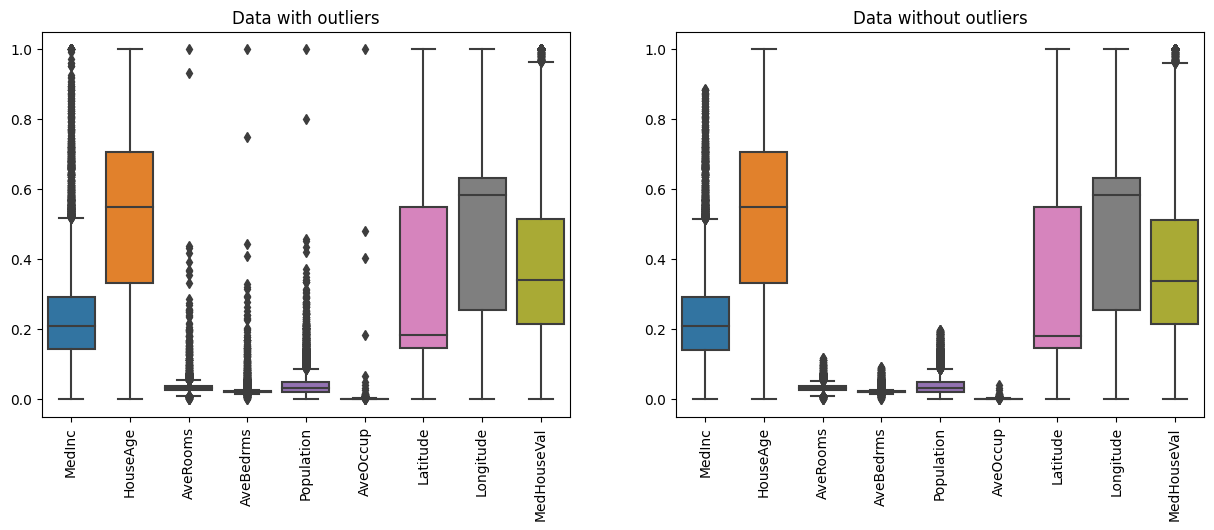

In [ ]:
plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
plot2=sns.boxplot(data1)
plt.title("Data with outliers")
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90);
plt.subplot(1,2,2)
plot1=sns.boxplot(data2)
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90);
plt.title("Data without outliers")

In [ ]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)

n=poly.fit_transform(data2)
data2=pd.DataFrame(n, columns=poly.get_feature_names_out(data2.columns),index=data2.index).drop(['1'],axis=1)

In [ ]:
# Useful for applying a non-linear transformation to the target y in regression problems.
ttr=TransformedTargetRegressor()

<h1> Feature Selection </h1>

In [ ]:
# eature selection using variance: var must be greater than threshold
from sklearn.feature_selection import VarianceThreshold
vat= VarianceThreshold(threshold=0)
#new_data=vat.fit_transform(df5)
#df6=pd.DataFrame(new_data, columns=vat.feature_names_in_)

In [ ]:
# feature selection using mutual_info_regression
from sklearn.feature_selection import mutual_info_regression
mir_data=mutual_info_regression(data2.iloc[:,:-1],data2.iloc[:,-1])

In [ ]:
col=np.array(list(data2.columns[:-1]))
col

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype='<U10')

In [ ]:
np.arange(1,8,1)

array([1, 2, 3, 4, 5, 6, 7])

Text(0.5, 1.0, 'mutual info regression')

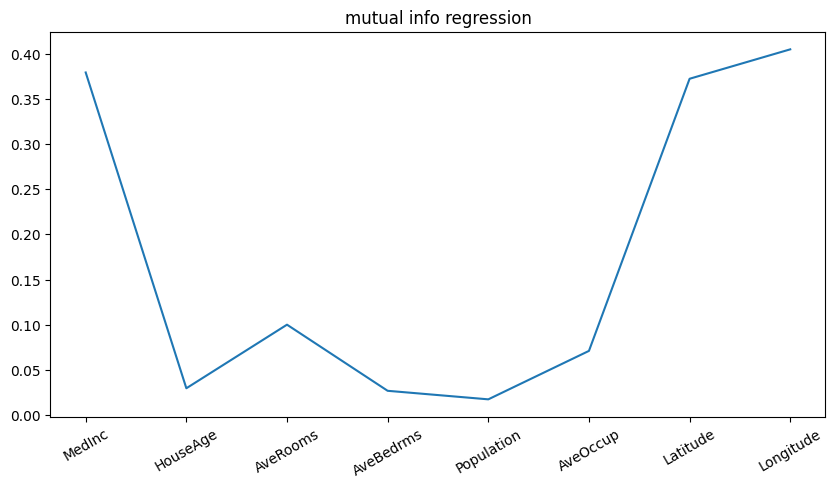

In [ ]:
plt.subplots(1,1, figsize=(10,5))
plt.subplot(1,1,1)
plot1=plt.plot(mir_data);
plt.xticks(np.arange(0,8,1),col, rotation=30);
plt.title("mutual info regression")
#plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90);

In [ ]:
# feature selection using selectkbest
from sklearn.feature_selection import SelectKBest, chi2
skb1=SelectKBest(chi2,k=10)
skb2=SelectKBest(mutual_info_regression, k=10)


skb_data=skb1.fit_transform(x,y)
skb_data.shape

In [ ]:
# feature selection based on percentile
from sklearn.feature_selection import SelectPercentile, chi2
sp=SelectPercentile(chi2, percentile=100) # percentile= n% of fetaure keep
sp_data=sp.fit_transform(x,y)
sp_data.shape

In [ ]:
# feature selection using recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

rfe=RFE(estimator=model,n_features_to_select=10, step=2) # step says how many we should eleiminate ata time
rfe.fit_transform(x,y)

# true says feature is selected, false says it unselected
rfe.support_

In [ ]:
# feature selection using  SequentialFeatureSelection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
sfs=SequentialFeatureSelector(estimator=model,n_features_to_select=9, direction="backward")
sfs.fit(x,y)

# true says feature is selected, false says it unselected
sfs.support_

In [ ]:
df6.corr()

<h1> model </h1>

In [ ]:
# train test split
# from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.25)
for train_index,test_index in sss.split(df6,df6["sentiment"]):
    sss_train=df6.iloc[train_index]
    sss_test=df6.iloc[test_index]

In [ ]:
xtrain=sss_train.drop(["sentiment"], axis=1)
ytrain=sss_train["sentiment"]
xtest=sss_test.drop(["sentiment"], axis=1)
ytest=sss_test["sentiment"]

In [ ]:
# dummy classiier
model=DummyClassifier(strategy="most_frequent")
model.fit(sss_train.drop(["sentiment"], axis=1),sss_train["sentiment"])
pred=model.predict(sss_test.drop(["sentiment"], axis=1))

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from  sklearn.svm import SVC
model0=SVC()
model1=LogisticRegression()


In [ ]:
model1.fit(sss_train.drop(["sentiment"], axis=1),sss_train["sentiment"])
pred1=model1.predict(sss_test.drop(["sentiment"], axis=1))

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred1,sss_test["sentiment"])
acc

In [ ]:
acc

<h1>  cross validation </h1>

In [ ]:

# k fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import  KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score,precision_score,recall_score

# n-folds =1
kfold=KFold(n_splits=10)
k_score_linear0=cross_validate(model1,xtrain,ytrain, cv=kfold, return_estimator=True )

# k_score_svc=cross_validate(model0,xtrain,ytrain, cv=kfold,scoring=["accuracy","recall_macro"])

# #leave one out
# lou=LeaveOneOut()
# l_score_linear=cross_val_score(model1,xtrain,ytrain, cv=lou)
# l_score_svc=cross_val_score(model0,xtrain,ytrain, cv=lou)


# #shuffle split:  random permute cross validator
# ssplit=ShuffleSplit(n_splits=2, test_size=0.3)
# l_score_linear=cross_val_score(model1,xtrain,ytrain, cv=ssplit)
# l_score_svc=cross_val_score(model0,xtrain,ytrain, cv=ssplit)


In [ ]:
k_score_linear=cross_validate(model1,xtrain,ytrain, cv=KFold(n_splits=20) , scoring="accuracy" , return_train_score=True )
print("Average Cross validation accuracy: ",k_score_linear["test_score"].mean(),"+/-",  k_score_linear["test_score"].std())
k_score_linear.keys()

plt1=plt.subplot(1,1,1)
plt.plot(k_score_linear["train_score"]);
plt.plot(k_score_linear["test_score"]);
plt.legend(["train score","test score"])

In [ ]:
# coeeficiant matrix  learned by cv estimators: to check stdev in wieghts by different estimators
coef1=pd.DataFrame(columns=xtrain.columns)
coef1['intercept']=None
for i in k_score_linear0["estimator"]:
    val=np.append(i.coef_,i.intercept_)
    data=dict(zip(coef1.columns,val))
    coef2=pd.DataFrame(data,index=[0]).reset_index()
    coef1=pd.concat([coef1,coef2],ignore_index=True)
coef1=coef1.drop(["index"],axis=1)
coef1

In [ ]:
plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
plot2=sns.violinplot(coef1)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90);
plt.title("violin plot for weights estimation by estimators")
plt.subplot(1,2,2)
plot1=sns.boxplot(coef1)
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90);
plt.title("boxplot plot for weights estimation by estimators")

In [ ]:
sns.heatmap(coef1.corr())
plt.title("correlation among eatures")

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mir_data=mutual_info_regression(xtrain,ytrain)
mir_data


In [ ]:
weight_avg=coef1.mean(axis=0)[:-1]
weight_avg

In [ ]:
plt1=plt.subplot(1,1,1);
plt.plot(list(xtrain.columns),mir_data,0);
plt.plot(list(xtrain.columns),weight_avg/10);
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90);
plt.xlabel("features")
plt.ylabel("mutual info")
plt.legend(["mutual_realtion","avg-weight"])

In [ ]:

# learning curve : for varing train size
from sklearn.model_selection import learning_curve
# 1%, 10%, 20%..........100% data uzsed to get curve
train_sizes=np.linspace(0.1,1,5)
learncurve=learning_curve(model1,xtrain,ytrain, train_sizes=train_sizes) # default use 5 cv fold
learncurve # train_sizes, train_acc, test_acc
print("Average train accuracy: ",learncurve[1].mean(),"+/-",  round(learncurve[1].std(),2))
print("Average test accuracy: ",learncurve[2].mean(),"+/-",  round(learncurve[2].std(),2))

In [ ]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.plot(learncurve[0],learncurve[1]);
plt.legend(["cv1","cv2","cv3","cv4","cv5"])
plt.subplot(1,2,2)
plt.plot(learncurve[0],learncurve[2]);
plt.legend(["cv1","cv2","cv3","cv4","cv5"])

<h3> Hyper paramer tuning </h3>
<ul>
    <li> grid search </li>
    <li> Randomnizedsearch </li>
 </ul>

In [ ]:
# validation curve: or varying param
from sklearn.model_selection import validation_curve
from sklearn.linear_model import SGDClassifier

early_learning_rate=1e-1
sgd=SGDClassifier(loss="log_loss",eta0=early_learning_rate,validation_fraction=0.3)
eta1=np.linspace(0.1,1e-7,10)
train_loss,test_loss=validation_curve(sgd,xtrain,ytrain,cv=3,param_name="eta0",param_range=eta1)
train_loss,test_loss

In [ ]:
model=SGDClassifier(loss="log_loss",eta0=1e-3,validation_fraction=0.3)
model.fit(xtrain,ytrain)
pred=model.predict(xtest)


from sklearn.metrics import log_loss, accuracy_score
print("log loss :",log_loss(ytest,pred))
print("accuracy: ",accuracy_score(ytest,pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=SVC(),
                  param_grid={"kernel":["linear","poly"],
                              "degree":[1,5],
                              "C":[0.1,8]
                             },
                  verbose=2,
                  scoring="accuracy"
                 )
#grid.fit(sss_train.drop(["sentiment"], axis=1),sss_train["sentiment"])

<h1> ROC CURVE </h1>

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(ytest,pred)
plt.plot(tpr,fpr);
plt.title("roc curvr")
plt.xlabel("tpr")
plt.ylabel("fpr")

<h3> Regularization </h3>

In [ ]:
from sklearn.linear_model import Ridge, Lasso
rmodel=Ridge(alpha=1e-3)

#<h1> Linear Regression</h1>

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline

In [26]:
data=fetch_california_housing(as_frame=True)
data

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [27]:
data.keys()
y=data["target"]
x=data["data"]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,shuffle=True)

In [28]:
from sklearn.linear_model import LinearRegression
cat_col=x.select_dtypes(include=["object"]).columns
num_col=x.select_dtypes(exclude="object").columns


linear_pipe=Pipeline(steps=[("polynomialfeatures",PolynomialFeatures()),
                            ("minmax",MinMaxScaler()),
                            ("model",LinearRegression())])

cv=ShuffleSplit(n_splits=5,test_size=0.25)
for train, test in cv.split(x):
  print(train,test)

cross_validate1=cross_validate(linear_pipe,x,y,cv=cv,scoring="neg_mean_absolute_error",return_train_score=True)

[ 8877 11952 18725 ... 10742  3679  9687] [ 1893 19687  1741 ... 19311   958 13345]
[17934  9738 20068 ...   670  9793 14270] [ 1474 17214 19607 ...  2342 14431  2846]
[12439 17579 11345 ...  5013   278  3754] [12685 10158 14285 ...  2939  6102 14576]
[11317  5382 15484 ... 17677 18060 17935] [10234 20476  7626 ...   322  3325 20489]
[11418  8150  2239 ... 14956  4230 17005] [  643    38  8814 ...  7048 14268  6340]


In [29]:
print("Mean Absolute error  for train is:  " ,-1*cross_validate1["train_score"].mean().round(2),"+-",cross_validate1["train_score"].var().round(2))
print("Mean Absolute error  for test is: " ,-1*cross_validate1["test_score"].mean().round(2),"+-",cross_validate1["test_score"].var().round(2))

Mean Absolute error  for train is:   0.46 +- 0.0
Mean Absolute error  for test is:  0.56 +- 0.01


In [31]:
poly_param=[2,4]
train_score,test_score=validation_curve(linear_pipe,x,y,cv=cv,param_name="polynomialfeatures__degree",param_range=poly_param)

In [32]:
print("Mean Absolute error  for train is:  " ,train_score.mean().round(2),"+-",train_score.var().round(2))
print("Mean Absolute error  for test is: " ,test_score.mean().round(2),"+-",test_score.var().round(2))

Mean Absolute error  for train is:   0.74 +- 0.0
Mean Absolute error  for test is:  -1392766396.96 +- 1.5627618846463644e+19
